In [3]:
import pandas as pd
df = pd.read_csv("covid_19_clean_complete.csv")

In [4]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [5]:
df.count()
#null values means either missing or not in form of int64
df.isnull()
#false means not null, true means null
df.isnull().sum()
#to show number of null values present in each column

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

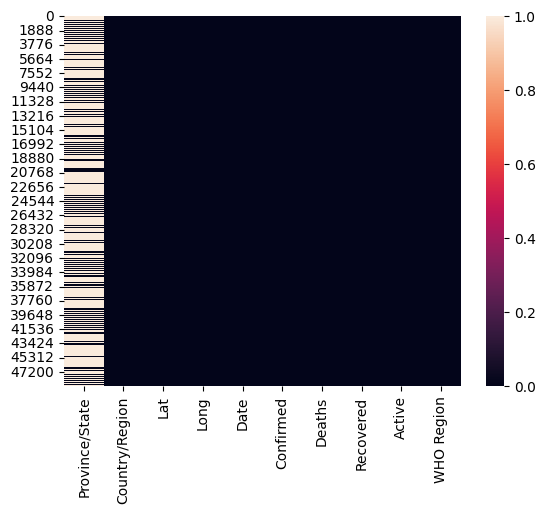

In [7]:
sns.heatmap(df.isnull())
plt.show()
#To show the result in the form of a heatnap for null values

Question number 1. Show the number of confirmed, deaths and recovered cases in each region. hint: whenever each is mentioned its recommended to use group by function

In [8]:
df.head(3)
df.groupby('Country/Region').sum('confirmed')

,Lat,Long,Confirmed,Deaths,Recovered,Active
Country/Region,,,,,,
Afghanistan,6380.552680,12729.471164,1936390,49098,798240,1089052
Albania,7736.820400,3791.640400,196702,5708,118877,72117
Algeria,5270.373200,312.004800,1179755,77972,755897,345886
Andorra,7991.184400,286.098400,94404,5423,69074,19907
Angola,-2106.107600,3360.293200,22662,1078,6573,15011
...,...,...,...,...,...,...
West Bank and Gaza,6007.013600,6623.841600,233461,1370,61124,170967
Western Sahara,4552.514000,-2422.530400,901,63,648,190
Yemen,2923.912676,9121.080944,67180,17707,23779,25694


In [9]:
df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending= False).head(10)

Country/Region
US                224345948
Brazil             89524967
Russia             45408411
India              40883464
Spain              27404045
United Kingdom     26748587
Italy              26745145
France             21210926
Germany            21059152
Iran               19339267
Name: Confirmed, dtype: int64

Question 2: Remove all records where cases are less than 100000

In [10]:
df.head(2)
df=df[~(df.Confirmed < 100000)]

In [38]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
17188,NaN,US,40.000000,-100.00000,2020-03-27,102276,2300,869,99107,Americas
17449,NaN,US,40.000000,-100.00000,2020-03-28,122069,2934,1072,118063,Americas
17710,NaN,US,40.000000,-100.00000,2020-03-29,141205,3561,2665,134979,Americas
17883,NaN,Italy,41.871940,12.56738,2020-03-30,101739,11591,14620,75528,Europe
17971,NaN,US,40.000000,-100.00000,2020-03-30,162707,4381,5644,152682,Americas
...,...,...,...,...,...,...,...,...,...,...
49005,NaN,South Africa,-30.559500,22.93750,2020-07-27,452529,7067,274925,170537,Africa
49006,NaN,Spain,40.463667,-3.74922,2020-07-27,272421,28432,150376,93613,Europe
49018,NaN,Turkey,38.963700,35.24330,2020-07-27,227019,5630,210469,10920,Europe
49028,NaN,United Kingdom,55.378100,-3.43600,2020-07-27,300111,45759,0,254352,Europe


Question 3. Which region had the most confirmed cases?

In [11]:
df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending= False).head(100)

Country/Region
US                223971445
Brazil             88250027
Russia             44373188
India              39333977
Spain              26661348
Italy              25738936
United Kingdom     25386565
Germany            20120477
France             19445644
Peru               17552760
Turkey             16635674
Iran               16067731
Chile              15317955
Mexico             12957455
Pakistan           10729248
Saudi Arabia        9873230
South Africa        9279547
Bangladesh          6718614
Colombia            4547106
Qatar               2319330
Argentina           2103465
Iraq                 537127
Indonesia            100303
Name: Confirmed, dtype: int64

Question 4. In which regions minimum number of deaths were recorded?

In [12]:
df.groupby('Country/Region')['Deaths'].sum().sort_values(ascending= True).head(10)

Country/Region
Qatar             3356
Indonesia         4838
Iraq             21438
Argentina        38387
Bangladesh       86085
Saudi Arabia     89410
South Africa    143632
Colombia        156964
Pakistan        220651
Chile           307208
Name: Deaths, dtype: int64

Question 5. How many confirmed, recovered cases, and deaths were reported from India till 2020-07-01?

In [31]:
#df.loc[:, 'Country/Region'] = df['Country/Region'].rename('Country')
df[df.Country == 'India'][df.Date == '2020-07-01']

C:\Users\Acer\AppData\Local\Temp\ipykernel_456\891640378.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.Country == 'India'][df.Date == '2020-07-01']


,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
42150,NaN,India,20.593684,78.96288,2020-07-01,604641,17834,359860,226947,South-East Asia


Question 6 A. Sort the entire data frame with respect to confirmed cases in ascending order.

In [34]:
df.sort_values(by = 'Confirmed', ascending= True)

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
19432,NaN,Germany,51.165691,10.451526,2020-04-05,100123,1584,28700,69839,Europe
44898,NaN,Argentina,-38.416100,-63.616700,2020-07-12,100166,1845,42694,55627,Americas
48937,NaN,Indonesia,-0.789300,113.921300,2020-07-27,100303,4838,58173,37292,South-East Asia
30666,NaN,India,20.593684,78.962880,2020-05-18,100328,3156,39233,57939,South-East Asia
43509,NaN,Qatar,25.354800,51.183900,2020-07-06,100345,133,93898,6314,Eastern Mediterranean
...,...,...,...,...,...,...,...,...,...,...
47986,NaN,US,40.000000,-100.000000,2020-07-23,4038816,144430,1233269,2661117,Americas
48247,NaN,US,40.000000,-100.000000,2020-07-24,4112531,145560,1261624,2705347,Americas
48508,NaN,US,40.000000,-100.000000,2020-07-25,4178970,146465,1279414,2753091,Americas
48769,NaN,US,40.000000,-100.000000,2020-07-26,4233923,146935,1297863,2789125,Americas


Question 6 B. Sort the entire data frame with respect to recovered cases in descending order.

In [33]:
df.sort_values(by= 'Recovered', ascending= False)

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48835,NaN,Brazil,-14.2350,-51.9253,2020-07-27,2442375,87618,1846641,508116,Americas
48574,NaN,Brazil,-14.2350,-51.9253,2020-07-26,2419091,87004,1812913,519174,Americas
48313,NaN,Brazil,-14.2350,-51.9253,2020-07-25,2394513,86449,1785359,522705,Americas
48052,NaN,Brazil,-14.2350,-51.9253,2020-07-24,2343366,85238,1693214,564914,Americas
47791,NaN,Brazil,-14.2350,-51.9253,2020-07-23,2287475,84082,1620313,583080,Americas
...,...,...,...,...,...,...,...,...,...,...
27365,NaN,United Kingdom,55.3781,-3.4360,2020-05-05,195527,29446,0,166081,Europe
27104,NaN,United Kingdom,55.3781,-3.4360,2020-05-04,191843,28752,0,163091,Europe
45374,NaN,United Kingdom,55.3781,-3.4360,2020-07-13,290133,44830,0,245303,Europe
26843,NaN,United Kingdom,55.3781,-3.4360,2020-05-03,188465,28464,0,160001,Europe
